##Linear Regression using Gradient Decent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

A gradient measures how much the output of a function changes if you change the inputs a little bit. Said it more mathematically, a gradient is a partial derivative with respect to its inputs.

You start by defining the initial parameters values and from there on Gradient Descent iteratively adjusts the values, using calculus, so that they minimize the given cost-function.

##Importance of the Learning Rate

How big the steps are that Gradient Descent takes into the direction of the local minimum are determined by the so-called learning rate. It determines how fast or slow we will move towards the optimal weights.

In order for Gradient Descent to reach the local minimum, we have to set the learning rate to an appropriate value, which is neither too low nor too high.

This is because if the steps it takes are too big, it maybe will not reach the local minimum because it just bounces back and forth between the convex function of gradient descent like you can see on the left side of the image below. If you set the learning rate to a very small value, gradient descent will eventually reach the local minimum but it will maybe take too much time like you can see on the right side of the image.

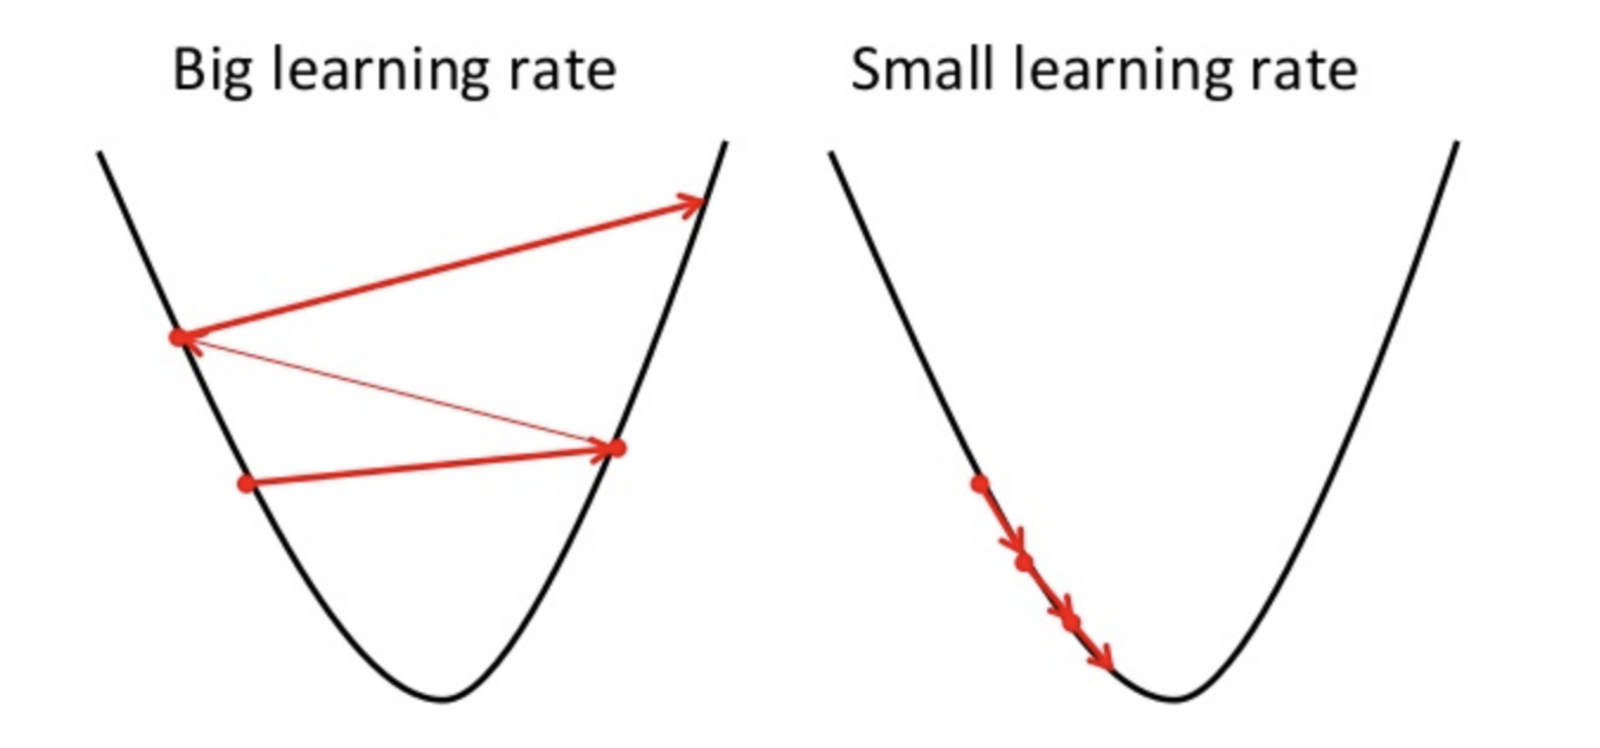

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.animation as animation
style.use('ggplot')
#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

In [2]:
df=pd.read_csv('Linear_regression.csv')

#replacing all missing data with NaN value
df.replace('?',np.nan,inplace=True)

#delete all the rows that have NaN in them
dk=df.dropna()

#deleting the column with id, 1 in the argument indicates 'column', so this will delete the 'column' containing 'id'
#df.drop(['id'],1,inplace=True)


full_data=dk.values.tolist()
headers = df.dtypes.index
header=headers.tolist()

height=np.array(dk['height'], dtype=np.float64)
width=np.array(dk['width'], dtype=np.float64)
xs=height
ys=width

In [3]:
def shift_origin(xs,ys):
    x_mean=np.mean(xs)
    y_mean=np.mean(ys)
    shifted_x=xs-x_mean
    shifted_y=ys-y_mean
    #plt.scatter(shifted_x,shifted_y)
    return shifted_x,shifted_y,x_mean,y_mean

In [4]:
#shifting the origin to reduce calculations and complexity

shifted_x,shifted_y,x_mean,y_mean=shift_origin(xs,ys)

In [5]:
#this acts as our cost function
#this function will run until the new error is smaller than the previous error, when the new error becomes greater than 
#previous error it means that we've passed the minima, in such case we take 2 steps back and reduce the learning rate

def sum_squared_mean(xs,ys):
    m=0     #initial slope
    m_list=[]    #list of all slopes throughout the program
    learning=0.05  #initial learning rate
    squared_error=[]  #
    squared_error_list=[] #list of all squared errors
    sum=0
    
    #shift of mean of the passed dataset
    shifted_x,shifted_y,x_mean,y_mean=shift_origin(xs,ys)
    
    #limit for the minimum learning rate
    while learning>0.000001:
        
        #calculate the squared error
        sum=0
        for i in range(len(xs)):
            sum+=(m*shifted_x[i]-shifted_y[i])**2
         
        #append error and slope in lists
        squared_error_list.append(sum)
        m_list.append(m)
        
        
        #if errror is 0 then the slope is perfect
        if sum==0:
            return m
        
        
        #if this is the first time the error is being calculated, meaning that there is no previour error to compare this 
        #new error to, so directly append it to the list
        if len(squared_error)==0:
                squared_error.append(sum)
        
        #if previous error = new error then stop
        elif sum==squared_error[-1]:
            return m

        else:
            
            #if new error is greater than previous error, take 2 steps back and reduce the learning rate
            #also remove the squared errors for the last 2 steps 
            if squared_error[-1]<sum:
                m-=learning*2
                learning=learning/float(10)
                del(squared_error[-2:])
                squared_error.append(sum)
            else:
                squared_error.append(sum)
        
        #increment the slope by learning rate
        m+=learning
        
    
    return m,m_list,squared_error_list

In [6]:
m,m_list,squared_error_list=sum_squared_mean(xs,ys)

#best slope returned by the function
m

0.24444549999999998

<function matplotlib.pyplot.show(*args, **kw)>

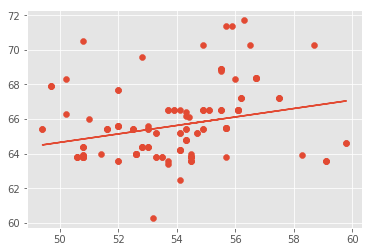

In [7]:
plt.scatter(shifted_x+x_mean,shifted_y+y_mean)
plt.plot(shifted_x+x_mean,m*shifted_x+y_mean)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

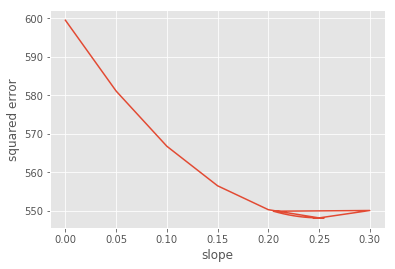

In [8]:
#shows how the slope has changed througout the program
#when the minima is exceded, 2 steps are taken back and learning rate is reduced.

plt.plot(m_list,squared_error_list)
plt.ylabel('squared error')
plt.xlabel('slope')
plt.show